<a href="https://colab.research.google.com/github/mn000000/Simulacion-2/blob/main/PORTAFOLIO_MANUEL_24_05_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [7]:
tickers = ['GOOG', 'MSFT', 'AAPL', 'WMT']
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2020,3,23)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3830 entries, 2005-01-03 to 2020-03-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    3830 non-null   float64
 1   MSFT    3830 non-null   float64
 2   AAPL    3830 non-null   float64
 3   WMT     3830 non-null   float64
dtypes: float64(4)
memory usage: 149.6 KB


In [9]:
mydata.head()

,GOOG,MSFT,AAPL,WMT
Date,,,,
2005-01-03,5.048826,18.626951,0.955513,11.886284
2005-01-04,4.844342,18.696609,0.965326,11.857316
2005-01-05,4.819685,18.654819,0.973781,11.872914
2005-01-06,4.696148,18.633909,0.974536,12.042239
2005-01-07,4.828153,18.578186,1.045493,12.028874


In [10]:
mydata.tail()

,GOOG,MSFT,AAPL,WMT
Date,,,,
2020-03-16,54.216499,130.375595,58.976845,33.183346
2020-03-17,55.990002,141.110275,61.570061,37.068611
2020-03-18,54.840000,135.170090,60.062828,38.100540
2020-03-19,55.764500,137.394043,59.602619,37.291954
2020-03-20,53.616001,132.233688,55.818718,35.581104


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [11]:
mydata.iloc[0]

GOOG     5.048826
MSFT    18.626951
AAPL     0.955513
WMT     11.886284
Name: 2005-01-03 00:00:00, dtype: float64

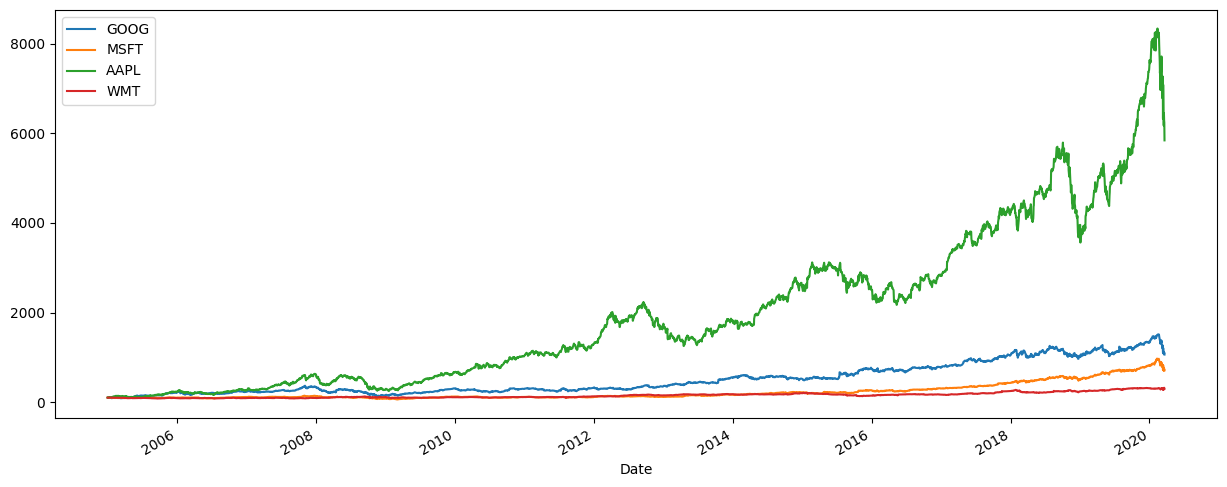

In [12]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

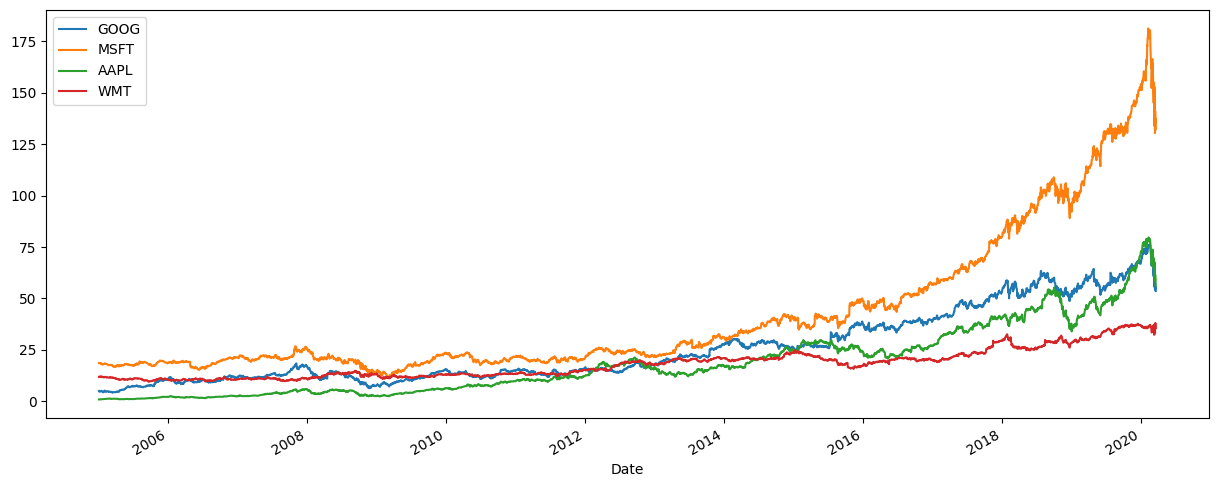

In [13]:
mydata.plot(figsize=(15,6))
plt.show()

In [14]:
mydata.loc['2005-1-03']

GOOG     5.048826
MSFT    18.626951
AAPL     0.955513
WMT     11.886284
Name: 2005-01-03 00:00:00, dtype: float64

In [15]:
mydata.iloc[0]

GOOG     5.048826
MSFT    18.626951
AAPL     0.955513
WMT     11.886284
Name: 2005-01-03 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [16]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,GOOG,MSFT,AAPL,WMT
Date,,,,
2005-01-03,NaN,NaN,NaN,NaN
2005-01-04,-0.040501,0.003740,0.010269,-0.002437
2005-01-05,-0.005090,-0.002235,0.008759,0.001315
2005-01-06,-0.025632,-0.001121,0.000775,0.014261
2005-01-07,0.028109,-0.002990,0.072811,-0.001110


In [66]:
weights = np.array([0.001, 0.25, 0.35, 0.25])

In [59]:
weights

array([0.15, 0.25, 0.35, 0.25])

In [60]:
np.dot(returns,weights)

array([        nan, -0.00215538,  0.00207214, ..., -0.01521332,
       -0.00134538, -0.04885812])

In [61]:
annual_returns= returns.mean()*250
annual_returns

GOOG    0.197574
MSFT    0.163992
AAPL    0.319785
WMT     0.091265
dtype: float64

In [62]:
np.dot(annual_returns, weights)

0.2053748149946491

In [63]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)* 100) + '%'
print(pfolio_1)

20.537%


In [64]:
weights_2= np.array([0.4, 0.4, 0.15, 0.05])

In [65]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%'
print(pfolio_1)
print(pfolio_2)

20.537%
19.716%
